In [1]:
include("duales.jl")
include("integracion_taylor.jl")

Main.IntegTaylor

In [2]:
using .DifAutom, .IntegTaylor, Plots, TaylorSeries

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [63]:
function Lorentz!(du,u,p,t)
    du[1] = u[3]
    du[2] = u[4]
    du[3] = p[1]*(p[3](u[1],u[2],t)[1] + u[4]*p[4](u[1],u[2],t))/p[2]
    du[4] = p[1]*(p[3](u[1],u[2],t)[2] - u[3]*p[4](u[1],u[2],t))/p[2]
end

Lorentz! (generic function with 1 method)

In [372]:
E(x,y,t) = [1.0,1.0]
B(x,y,t) = cos(0.05*t)

m =  1
q = -1

p =[q,m,E,B]

4-element Vector{Any}:
 -1
  1
   E (generic function with 2 methods)
   B (generic function with 2 methods)

In [373]:
x0 =[0.0,0.0,1.0,0.0]

t_ini = 0.0

t_fin = 200.0

orden = 20

ϵ = 1e-20

t, x, error = integracion_taylor(Lorentz!, x0, t_ini, t_fin, orden, ϵ, p; Nt = 10000, longitud = false)

([0.0, 0.3204751247252794, 0.642429685971456, 0.9682938440029358, 1.2899307323979765, 1.6108575180061262, 1.9341055241280143, 2.259515053212532, 2.58171872141751, 2.904011844798057  …  197.6750877191984, 197.95424892721903, 198.2352003375576, 198.5199927496131, 198.80495274839387, 199.08892839339228, 199.37387175350355, 199.66167655812572, 199.95388455004172, 200.0], [[0.0, 0.0, 1.0, 0.0], [0.26956101395022675, -0.005458481402907537, 0.6849829366323273, -0.05092456605524092], [0.44307220112771406, -0.043298248398178765, 0.4008552135604984, -0.19941713141627673], [0.5349931059769295, -0.14441661653086774, 0.17602215009440966, -0.43343191366582323], [0.5670611556438855, -0.32921688826106543, 0.0388820611063003, -0.7230488576565804], [0.5705626110779383, -0.6118642525398135, -0.00015318392714182283, -1.0404822244798009], [0.5779895965535135, -0.9997957710050203, 0.06299147890929861, -1.3563349226823855], [0.6221438757640134, -1.4883710067246527, 0.22345617510091542, -1.6378405293955047], 

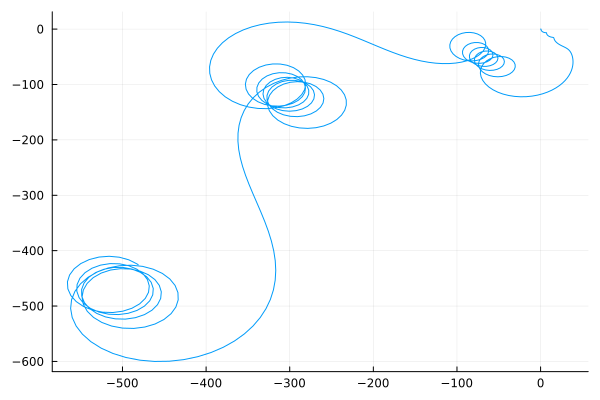

In [374]:
plot([(x[i][1],x[i][2]) for i in 1:length(x)], leg = false)

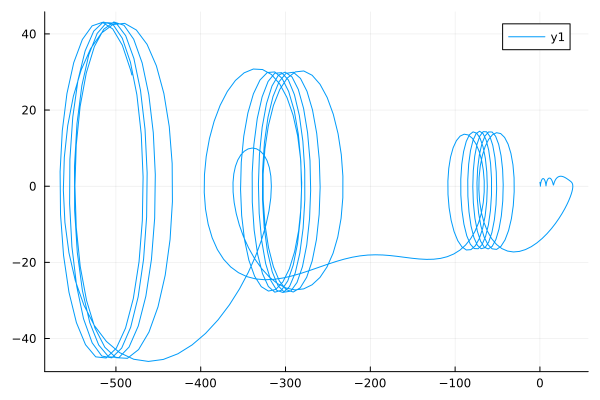

In [375]:
plot([(x[i][1],x[i][3]) for i in 1:length(x)])

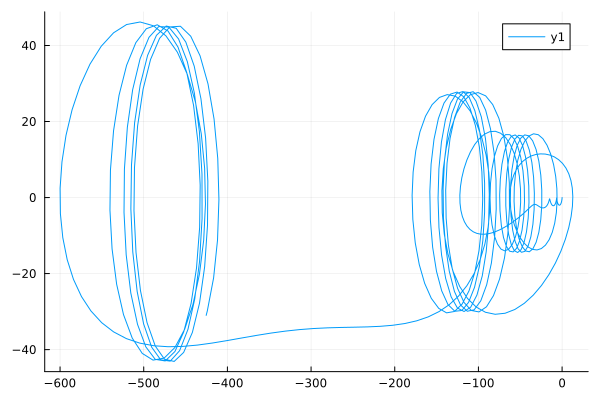

In [376]:
plot([(x[i][2],x[i][4]) for i in 1:length(x)])

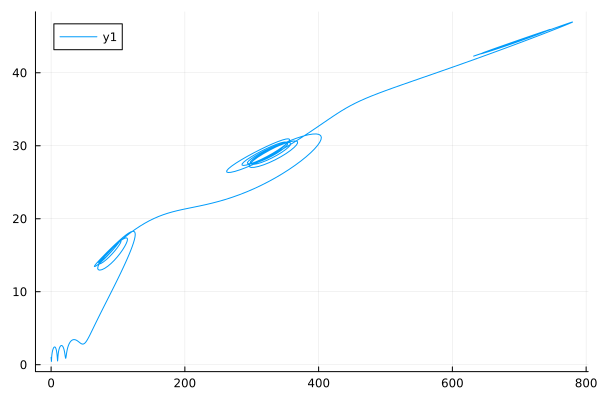

In [377]:
plot([(norm([x[i][1],x[i][2]]),norm([x[i][3],x[i][4]])) for i in 1:length(x)])

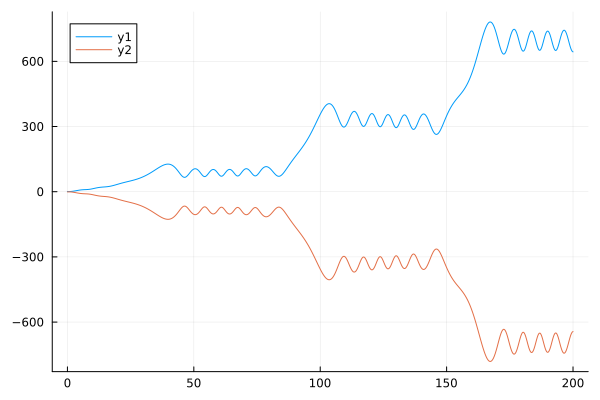

In [379]:
plot(t,norm.(x))
plot!(t,-1.0*norm.(x))